<a href="https://colab.research.google.com/github/itsJeromeJ/Prodigy_ds_04/blob/main/Prodigy_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
! mkdir -p ~ /. kaggle

In [ ]:
!cp kaggle.json ~/. kaggle/

cp: cannot stat 'kaggle.json': No such file or directory
cp: -r not specified; omitting directory '/root/.'


In [ ]:
!chmod 600 ~/. kaggle/ kaggle.json

In [ ]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 92.3MB/s]


In [ ]:
from zipfile import ZipFile
dataset ='/content/twitter-entity-sentiment-analysis.zip'
with ZipFile (dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
train_data=pd.read_csv('/content/twitter_training.csv')
valid_data=pd.read_csv('/content/twitter_validation.csv')

In [ ]:
print(train_data.head())
print(valid_data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0

In [ ]:
Column_name=['tweetID','Entity','Sentiment','Tweet_Content']
train_data.columns=Column_name
valid_data.columns=Column_name
data=pd.concat([train_data,valid_data], ignore_index=False)
data.head()

,tweetID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
data.duplicated().sum()

3216

In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
print(data.isnull().sum())
print('duplicate values :' , data.duplicated().sum())

tweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64
duplicate values : 0


In [ ]:
data.isnull().sum()

,0
tweetID,0
Entity,0
Sentiment,0
Tweet_Content,0


In [ ]:
print(train_data.columns)

Index(['tweetID', 'Entity', 'Sentiment', 'Tweet_Content'], dtype='object')


<ipython-input-21-a1982457fd00>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=train_data, palette='viridis')


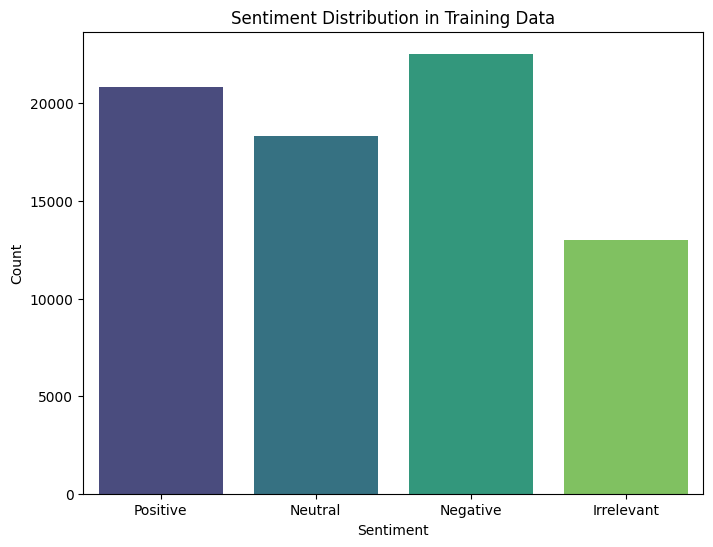

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=train_data, palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-22-a79dff363409>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=valid_data, palette='viridis')


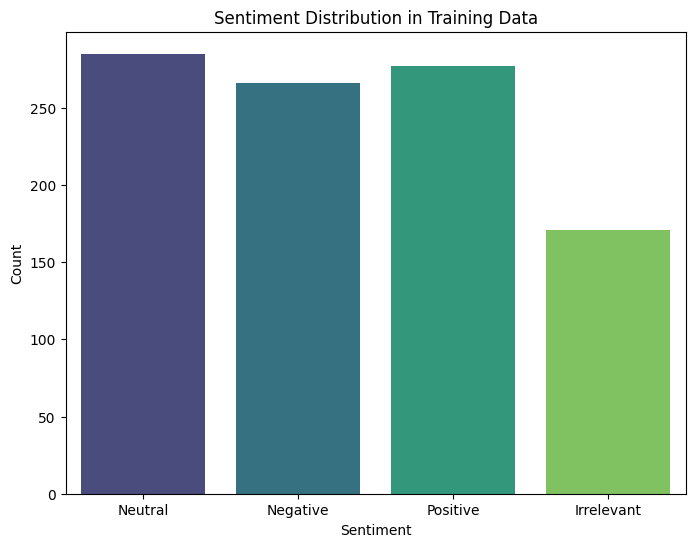

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=valid_data, palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
train_data['tweet_length'] = train_data['Tweet_Content'].apply(len)

print(train_data[['Tweet_Content', 'tweet_length']].head())

                                       Tweet_Content  tweet_length
0  I am coming to the borders and I will kill you...            51
1  im getting on borderlands and i will kill you ...            50
2  im coming on borderlands and i will murder you...            51
3  im getting on borderlands 2 and i will murder ...            57
4  im getting into borderlands and i can murder y...            53


In [ ]:
valid_data['tweet_length'] = valid_data['Tweet_Content'].apply(len)
print(valid_data[['Tweet_Content', 'tweet_length']].head())

                                       Tweet_Content  tweet_length
0  BBC News - Amazon boss Jeff Bezos rejects clai...           109
1  @Microsoft Why do I pay for WORD when it funct...            91
2  CSGO matchmaking is so full of closet hacking,...            71
3  Now the President is slapping Americans in the...           170
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...           268


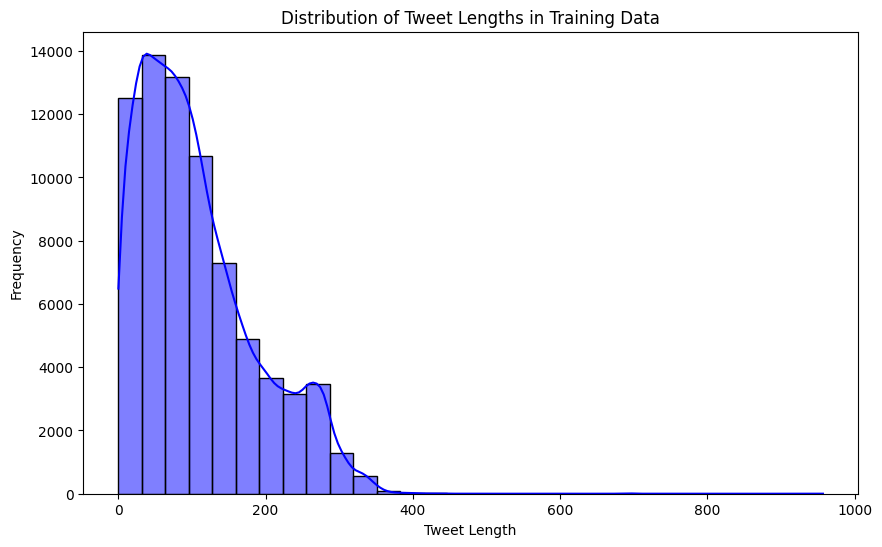

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['tweet_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths in Training Data')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


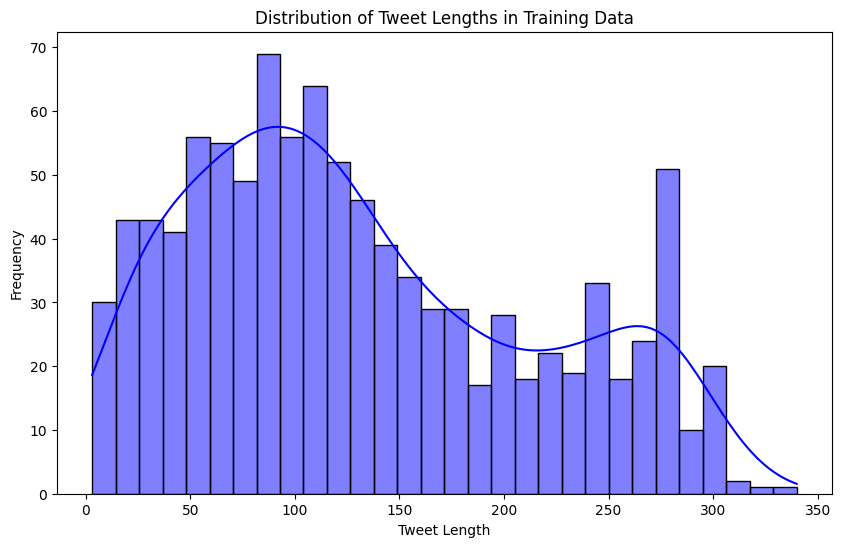

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(valid_data['tweet_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths in Training Data')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

Correlation between Tweet Length and Sentiment:
                   tweet_length  sentiment_numeric
tweet_length                1.0                NaN
sentiment_numeric           NaN                NaN


<ipython-input-56-3db25f181412>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='tweet_length', data=train_data, palette='coolwarm')


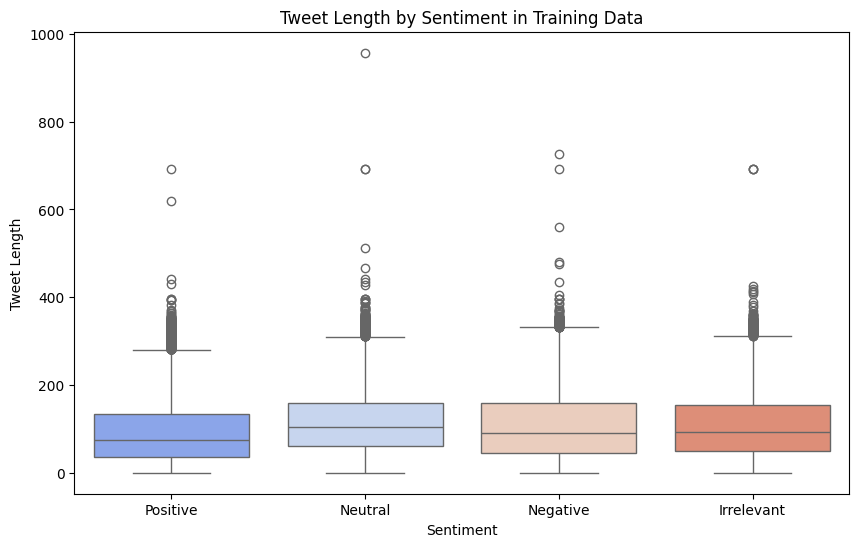

In [ ]:
train_data['sentiment_numeric'] = train_data['Sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})
correlation = train_data[['tweet_length', 'sentiment_numeric']].corr()
print("Correlation between Tweet Length and Sentiment:")
print(correlation)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='tweet_length', data=train_data, palette='coolwarm')
plt.title('Tweet Length by Sentiment in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

Correlation between Tweet Length and Sentiment:
                   tweet_length  sentiment_numeric
tweet_length                1.0                NaN
sentiment_numeric           NaN                NaN


<ipython-input-57-cfef8d3228e7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='tweet_length', data=valid_data, palette='coolwarm')


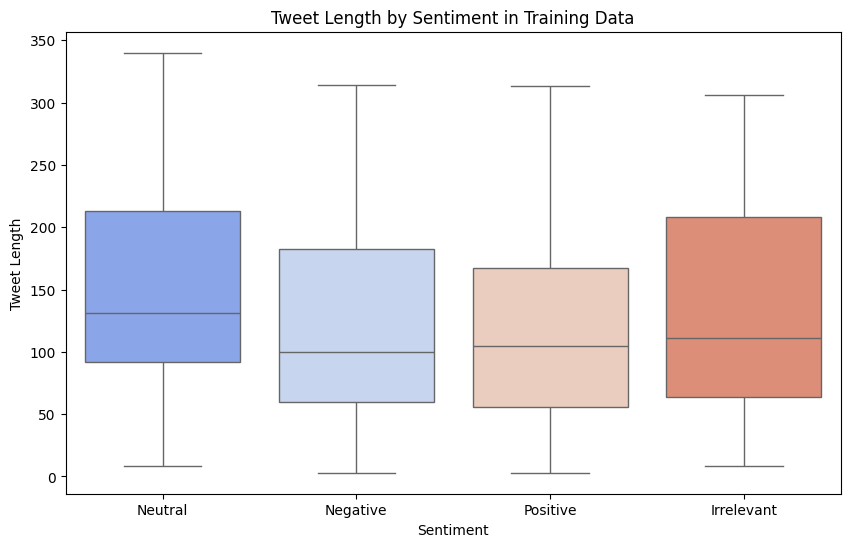

In [ ]:
valid_data['sentiment_numeric'] = valid_data['Sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})
correlation = valid_data[['tweet_length', 'sentiment_numeric']].corr()
print("Correlation between Tweet Length and Sentiment:")
print(correlation)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='tweet_length', data=valid_data, palette='coolwarm')
plt.title('Tweet Length by Sentiment in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()